In [2]:
from utils import *
from jupyter_utils import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import matplotlib
from ising_builds.cy_ising_cluster import simulate
from tqdm import tqdm
import os

In [3]:
U_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
lengths = [250, 500, 1000]

In [4]:
def read_dir(dir_name: str, lengths: list, load_number=None):
    if dir_name[-1] != '/':
        dir_name += '/'
    dirs = os.listdir(dir_name)

    res = {}
    for d in dirs:
        for L in lengths:
            if d.find(f'L{L}') != -1 or d.find(f'L={L}') != -1:
                print(L, d)
                res[L] = load_Conformations_lite_from_dir(dir_name+d, load_count=load_number)

    return res


In [5]:
confs = {}

for u in U_values:
    confs[u] = read_dir(f"Conformations/U={u}/", lengths, load_number=1000)


1000 L1000_beta_0.1_1_10(1000)
500 L500_beta_0.1_1_10(1000)
250 L250_beta_0.1_1_10(1000)
500 L=500
250 L=250
1000 L=1000
500 L=500
250 L=250
1000 L=1000
500 L=500
250 L=250
1000 L=1000
500 L=500
250 L=250
1000 L=1000
500 L=500
250 L=250
1000 L=1000
500 L=500
250 L=250
1000 L=1000
500 L=500
250 L=250
1000 L=1000
500 L=500
250 L=250
1000 L=1000
500 L500_beta0.1_1_10(10000)
250 L250_beta0.1_1_10(10000)
1000 L1000_beta0.1_1_10(10000)


In [10]:
confs[0.1].keys()

dict_keys([1000, 500, 250])

In [7]:
def mean_mag_from_list(confs):
    mag = np.zeros_like(confs[0].mag2)
    for c in confs:
        mag += c.mag2
    
    mag /= len(confs)
    err = np.zeros_like(mag)
    for c in confs:
        err += (c.mag2 - mag) ** 2
    
    err /= len(confs)
    err = np.sqrt(err)
    return mag, err

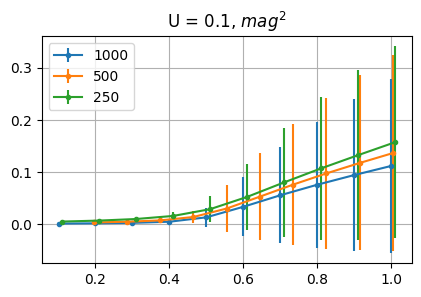

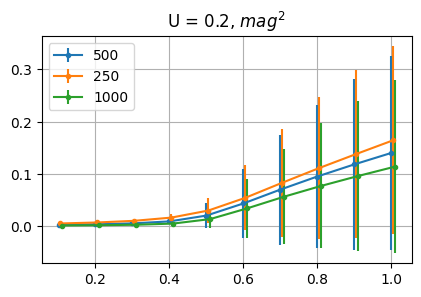

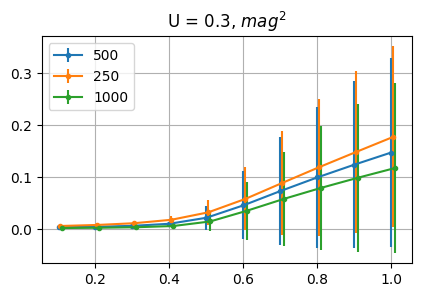

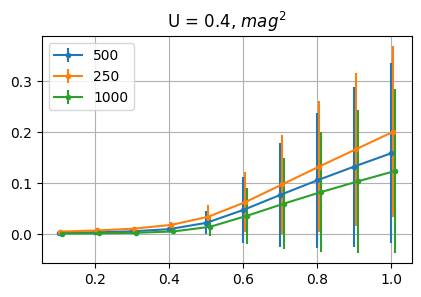

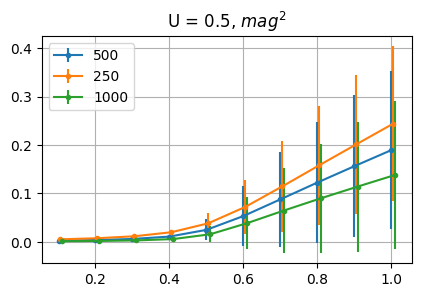

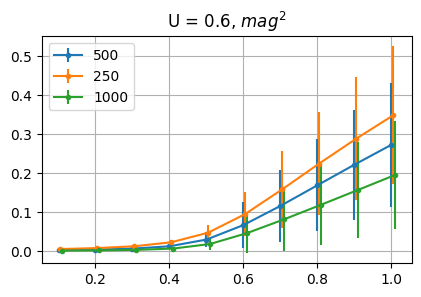

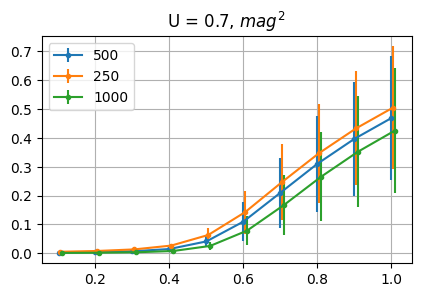

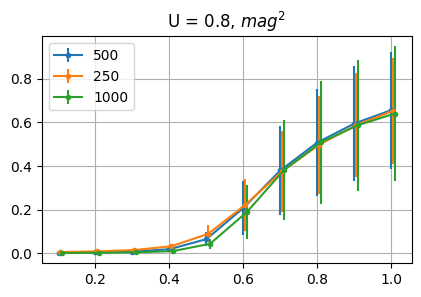

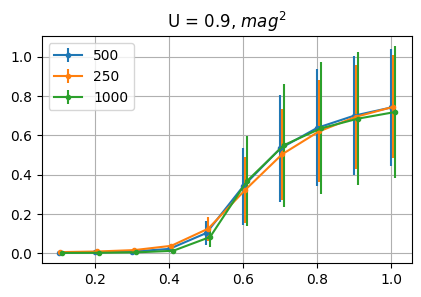

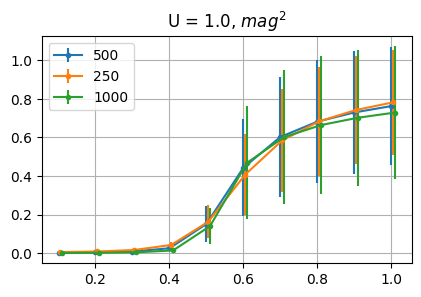

In [8]:
for u, conf in confs.items():
    plt.figure(figsize=set_size())
    plt.title(f"U = {u}, $mag^2$")
    k = 0
    for L, c in conf.items():
        mag, err = mean_mag_from_list(c)
        plt.errorbar(x=c[0].betas + 0.005*k, y=mag, fmt='.-', yerr=err, label=f"{L}")
        k += 1

    plt.legend(loc="upper left")
    plt.grid(True)
    plt.show()


In [15]:
MC_all = {}
for u, conf in confs.items():
    mc = {}
    for L, con in conf.items():
        mc[L] = []
        for c in con:
            mc[L].append(magnetic_susceptibility(c))
    MC_all[u] = mc

In [ ]:
def find_ms_peaks(confs):
    p = []
    for c in confs:
        ms = magnetic_susceptibility(c)
        p.append(np.argmax(ms))
        
    return p

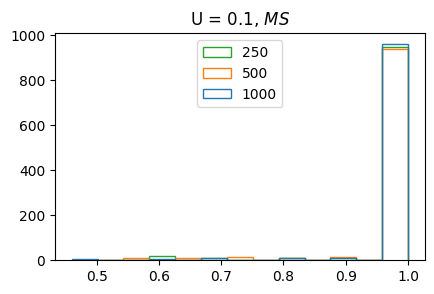

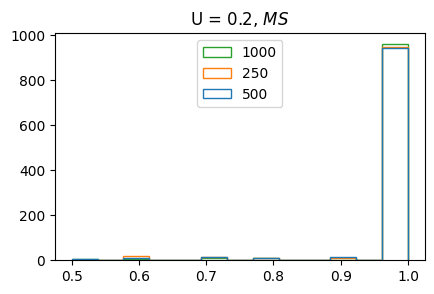

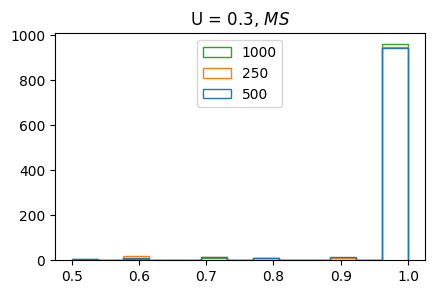

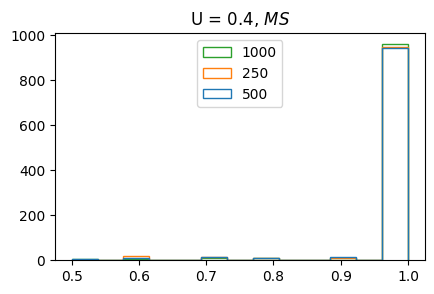

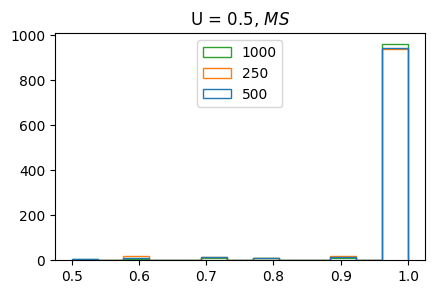

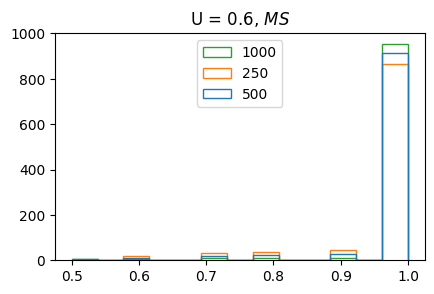

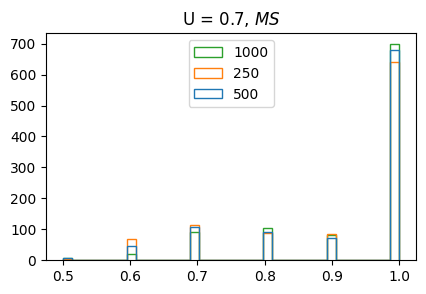

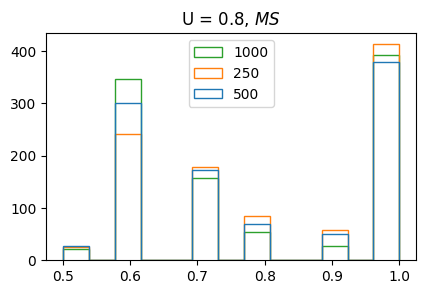

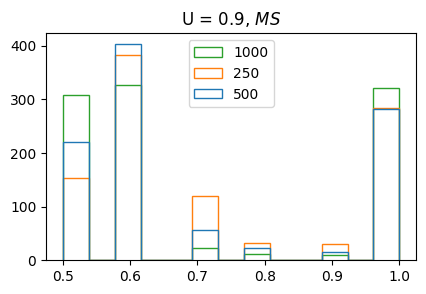

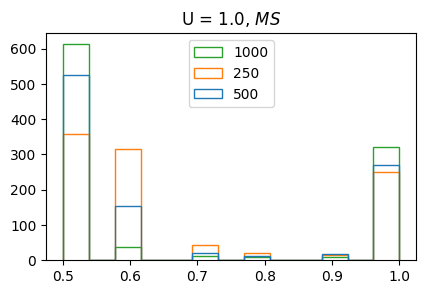

In [33]:
for u, MC in MC_all.items():
    plt.figure(figsize=set_size())
    plt.title(f"U = {u}, $MS$")
    hists = []
    labels = []
    for L, mc in MC.items():
        peaks = []
        for m in mc:
            peaks.append(np.argmax(m))
        peaks_beta = confs[u][L][0].betas[peaks]
        hists.append(peaks_beta)
        labels.append(str(L))
    plt.hist(hists, bins="auto", histtype="step", label=labels)
    plt.legend(loc="upper center")
    plt.show()
    